# Tarea Final -  Batalla de barrios(vecindarios) de Montevideo - Parte 2

### Contenido

- 4. Analisis de datos con Foursquare
    - 4.1 Filtrado de datos por Municipios seleccionados
    - 4.2 Aplicacion de APi de Foursquare
    - 4.3 Preparacion de datos para clustering
- 5. Análisis de clustering por K-Means
    - 5.1 Preparación y armado de clusters
    - 5.2 Preparación y armado del dataframe
    - 5.3 Visualización en el mapa de los clusters
    - 5.4 Análisis de cada cluster
- 6. Resultados y conclusiones finales
    - 6.1 Resumen de resultados obtenidos
    - 6.2 Conclusiones finales y recomendación

### 4. Análisis de datos con Foursquare


#### 4.1 Filtrado de datos por Municipios seleccionados

Como indicamos en la 1era. parte, seleccionaremos para trabajar con Foursquare los datos de los municipios B, CH y E.

In [1]:
import pandas as pd
import numpy as np
import json # librería para manejar archivos JSON 
!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # convertir una dirección en valores de latitud y longitud
import requests # librería para manejar solicitudes
from pandas.io.json import json_normalize # librería para convertir un archivo json en un dataframe pandas
# Matplotlib y módulos asociados para graficar
import matplotlib.cm as cm
import matplotlib.colors as colors
# importar k-means desde la fase de agrupación
from sklearn.cluster import KMeans
#!conda install -c conda-forge folium=0.5.0 --yes # retirar el comentario de esta línea si no ha completado el laboratorio de la API de FourSquare
import folium # librería para graficar mapas 
from folium.features import DivIcon


Solving environment: ...working... done

# All requested packages already installed.



In [2]:
# Importamos los datos de los dataframes guardados en la primera parte.
df_montevideo_coord2 = pd.read_csv(r'C:\Users\HUGO\Documents\Downloads\df_montevideo_coord2.csv')
df_montevideo_coord2

,Barrio,Poblacion,Municipio,Latitud,Longitude
0,Pocitos,67992,CH,-34.911123,-56.150593
1,Cordón,42456,B,-34.900827,-56.180125
2,Unión,39880,"D, E y F",-34.880236,-56.137688
3,"La Paloma, Tomkinson",37424,A,-34.858785,-56.259420
4,Buceo,36998,CH y E,-34.897800,-56.128658
5,Casavalle,35979,D,-34.828916,-56.168784
6,"Peñarol, Lavalleja",34485,G,-34.841683,-56.186343
7,"Parque Batlle, Villa Dolores",31153,CH,-34.896868,-56.153383
8,Nuevo París,29873,A y G,-34.839535,-56.243839
9,Cerro,28306,NaN,-34.889817,-56.252625


In [3]:
# Importamos los datos de los dataframes guardados en la primera parte
df_montevideo_all_municipio = pd.read_csv(r'C:\Users\HUGO\Documents\Downloads\df_montevideo_all_municipio.csv')
df_montevideo_socioeconom_municipio = pd.read_csv(r'C:\Users\HUGO\Documents\Downloads\df_montevideo_socioeconom_municipio.csv')
print(df_montevideo_all_municipio.head())
print(df_montevideo_socioeconom_municipio.head())


  Municipio                                             Barrio  Poblacion
0         F  Villa García, Manga RuralMangaMaroñas, Parque ...     133776
1         G  Peñarol, LavallejaColón Centro y NoroesteConci...     123867
2         B  CordónCentroPalermoParque RodóBarrio SurCiudad...     115706
3        CH                PocitosParque Batlle, Villa Dolores      99145
4         E  MalvínMalvín NorteCarrascoPunta GordaCarrasco ...      91104
  Municipio  Nivel-SocioEconómico  IngresoxHogar
0         E              4.819555   24178.803953
1        CH              4.729483   14636.900456
2    B y CH              4.543561   12299.547249
3    CH y E              3.926684    7442.671847
4     A y C              3.883621    6193.896552


In [4]:
# De acuerdo a lo requerido, se selecciona los barios de los municipios B, CH y E
# Se unen los dataframes y se eliminan duplicados, reseteando el indice.
# Se descartan municipios que no fueron asignados, asignando a uno fuera de la selección ("A")
df_montevideo_coord2['Municipio'] = df_montevideo_coord2['Municipio'].fillna('A')
df_montevideo_b = df_montevideo_coord2[df_montevideo_coord2['Municipio'].str.contains('B')]
df_montevideo_ch = df_montevideo_coord2[df_montevideo_coord2['Municipio'].str.contains('CH')]
df_montevideo_e = df_montevideo_coord2[df_montevideo_coord2['Municipio'].str.contains('E')]
df_montevideo_bche = pd.concat([df_montevideo_b,df_montevideo_ch,df_montevideo_e])
df_montevideo_bche.drop_duplicates(['Barrio'], inplace = True)
df_montevideo_bche.reset_index(drop = True)


,Barrio,Poblacion,Municipio,Latitud,Longitude
0,Cordón,42456,B,-34.900827,-56.180125
1,Punta Carretas,24181,B y CH,-34.920202,-56.160065
2,Centro,22120,B,-34.906067,-56.189656
3,Aguada,18557,B y C,-34.896676,-56.189366
4,Tres Cruces,15926,B y CH,-34.892518,-56.167113
5,Palermo,12992,B,-34.911288,-56.180698
6,Parque Rodó,12944,B,-34.910082,-56.169778
7,Barrio Sur,12639,B,-34.911202,-56.194784
8,Ciudad Vieja,12555,B,-34.906351,-56.205979
9,La Comercial,11444,B y C,-34.886749,-56.169093


#### 4.2 Aplicación de API de Foursquare

In [5]:
# Definir la versión y credenciales de FourSquare
CLIENT_ID = 'YJMHHUOR0YOWTSLOP45GILZL3HWEZQE3H04FSUYDM0YESHNX' # su ID de Foursquare
CLIENT_SECRET = 'YUEDBHKPIKSCZFAK00DFXHOQ0K4MSPNPHHIVDM4JV13TPEOS' # Secreto de Foursquare
VERSION = '20180605' # versión de la API de Foursquare
LIMIT = 100 # Un valor límite para la API de Foursquare

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: YJMHHUOR0YOWTSLOP45GILZL3HWEZQE3H04FSUYDM0YESHNX
CLIENT_SECRET:YUEDBHKPIKSCZFAK00DFXHOQ0K4MSPNPHHIVDM4JV13TPEOS


In [6]:
# Ubicamos los datos de uno de los barrios de los municipios seleccionados.
print('El barrio elegido para probar Foursquare es:' , df_montevideo_bche.loc[0, 'Barrio'])
barrio_latitud = df_montevideo_bche.loc[0, 'Latitud'] # latitud del barrio 
barrio_longitud = df_montevideo_bche.loc[0, 'Longitude'] # longitud del barrio
barrio_name = df_montevideo_bche.loc[0, 'Barrio'] # nombre del barrio
print('Latitud y longitude de {} son {}, {}.'.format(barrio_name,barrio_latitud,barrio_longitud))

El barrio elegido para probar Foursquare es: Pocitos
Latitud y longitude de Pocitos son -34.9111227, -56.1505928.


In [7]:
# Para la API de Foursquare, cargamos los datos.Obtengamos los 100 sitios en Marble Hill dentro de un radio de 500 metros.
# Primero, generemos una URL de solicitud GET. Nombre su URL url.
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 500 # define radius
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    barrio_latitud, 
    barrio_longitud, 
    radius, 
    LIMIT)
url


'https://api.foursquare.com/v2/venues/explore?&client_id=YJMHHUOR0YOWTSLOP45GILZL3HWEZQE3H04FSUYDM0YESHNX&client_secret=YUEDBHKPIKSCZFAK00DFXHOQ0K4MSPNPHHIVDM4JV13TPEOS&v=20180605&ll=-34.9111227,-56.1505928&radius=500&limit=100'

In [8]:
# Enviar la solicitud GET y examinar los resultados.
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '61a115cfca841b5be5b70545'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Pocitos',
  'headerFullLocation': 'Pocitos, Montevideo',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 62,
  'suggestedBounds': {'ne': {'lat': -34.9066226955, 'lng': -56.14511550847283},
   'sw': {'lat': -34.9156227045, 'lng': -56.15607009152717}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4f3f42ace4b0d66d1ef42641',
       'name': 'Destino 26',
       'location': {'address': '26 Marzo 1125',
        'lat': -34.91043020494529,
        'lng': -56.15030094680103,
        'labeledLatLngs': [{'label': 'display',
          'lat': -34.91043020494529,
  

In [9]:
# Del laboratorio anterior de FourSquare sabemos que toda la información esta en la llave items.
# Antes de avanzar, usemos la función get_category_type del laboratorio anterios.
# función para extraer la categoria del sitio
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# Ahora estamos listos para limpiar el objeto json y estructurarlo en un dataframe pandas
venues = results['response']['groups'][0]['items']
nearby_venues = json_normalize(venues) # objeto JSON

# filtrar columnas
filtered_columns = ['venue.name', 'venue.location.address' , 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filtrar la categoría para cada fila
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# limpiar columnas
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]
nearby_venues.head()

# ¿Cuantos sitios nos regresó FourSquare?
print('{} venues fueron devueltos por Foursquare.'.format(nearby_venues.shape[0]))

62 venues fueron devueltos por Foursquare.


<ipython-input-9-5d93b22b1db1>:17: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  nearby_venues = json_normalize(venues) # objeto JSON


In [10]:
nearby_venues.head()

,name,address,categories,lat,lng
0,Destino 26,26 Marzo 1125,Bed & Breakfast,-34.910430,-56.150301
1,Petite Patisserie De Flor,José Martí 3340,Dessert Shop,-34.912180,-56.149359
2,Cake's,José Ellauri 1067,Dessert Shop,-34.911405,-56.152888
3,Aerobic,Av. 26 de Marzo 1069,Gym / Fitness Center,-34.911045,-56.151235
4,Miyagi Shushi,Gabriel Pereira 3138,Japanese Restaurant,-34.908886,-56.148351


In [11]:
# filtramos por los que son competencia, o sea categoria "Gym / Fitness Center "
nearby_gym_fitness = nearby_venues[nearby_venues['categories'] == 'Gym / Fitness Center']
print('{} gyms-fitness center  en {} fueron devueltos por Foursquare.'.format(nearby_gym_fitness.shape[0],results['response']['headerFullLocation']))
nearby_gym_fitness

2 gyms-fitness center  en Pocitos, Montevideo fueron devueltos por Foursquare.


,name,address,categories,lat,lng
3,Aerobic,Av. 26 de Marzo 1069,Gym / Fitness Center,-34.911045,-56.151235
16,Aerobic,Gabriel Pereira 3119,Gym / Fitness Center,-34.908552,-56.148650


###### En principio no habria mucha competencia en uno de los barrios de mayor población y nivel socioecoómico.
Veamos que otras categorias tenemos en el dataframe


In [12]:
print(nearby_venues['categories'].unique())

['Bed & Breakfast' 'Dessert Shop' 'Gym / Fitness Center'
 'Japanese Restaurant' 'Italian Restaurant' 'Café' 'Falafel Restaurant'
 'Sandwich Place' 'Restaurant' 'Pizza Place' 'Burger Joint' 'Beach'
 'Scenic Lookout' 'Latin American Restaurant' 'Coffee Shop'
 'Shopping Mall' 'Ice Cream Shop' 'Hotel' 'Convenience Store' 'Newsstand'
 'Empanada Restaurant' 'South American Restaurant'
 'Middle Eastern Restaurant' 'BBQ Joint' 'Supermarket' 'Bar' 'Bakery'
 'Basketball Stadium' 'Market' 'Beer Store' 'Multiplex' 'Steakhouse'
 'Pharmacy' 'Mexican Restaurant' 'Diner' 'Paper / Office Supplies Store'
 'Cocktail Bar' 'Hot Dog Joint' 'Hostel' 'Chinese Restaurant' 'Nightclub'
 'Sporting Goods Shop' 'Liquor Store']


In [13]:
# Filtremos por Sporting Goods Shop y Basketball stadium
nearby_sports = nearby_venues[nearby_venues['categories'] == 'Sporting Goods Shop']
nearby_sports2 = nearby_venues[nearby_venues['categories'] == 'Basketball Stadium']
print('{} sports center  en {} fueron devueltos por Foursquare.'.format(nearby_sports.shape[0]+nearby_sports2.shape[0],results['response']['headerFullLocation']))
nearby_sports.append(nearby_sports2)

2 sports center  en Pocitos, Montevideo fueron devueltos por Foursquare.


,name,address,categories,lat,lng
59,Motociclo Sports,Miguel Barreiro 3243,Sporting Goods Shop,-34.909032,-56.146623
40,Club Trouville,Chucarro 1031,Basketball Stadium,-34.912473,-56.149755


#### 4.3 Preparación de datos para clustering

Vamos a crear una función que repita el mismo proceso para todos los barrios de los municipios B,CH,E

In [14]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # crear la URL de solicitud de API
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # solicitud GET
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # regresa solo información relevante de cada sitio cercano
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'],
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],
            v['venue']['location']['formattedAddress'][0],
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Barrio', 
                  'Barrio Latitud', 
                  'Barrio Longitud', 
                  'Local',
                  'Local Latitud', 
                  'Local Longitud',
                  'Local Dirección(esquina)',          
                  'Local Categoria']
    
    return(nearby_venues)

Ahora desarrollamos el código para determinar los sitios por barrio de los municipios B,CH y E, y creamos un dataframe **df_montevideo_bche_sitios.**

In [15]:
df_montevideo_bche_sitios = getNearbyVenues(names=df_montevideo_bche['Barrio'],
                                   latitudes=df_montevideo_bche['Latitud'],
                                   longitudes=df_montevideo_bche['Longitude']
                                  )
#results
print(df_montevideo_bche_sitios.shape)
df_montevideo_bche_sitios.head(20)

Cordón
Punta Carretas
Centro
Aguada
Tres Cruces
Palermo
Parque Rodó
Barrio Sur
Ciudad Vieja
La Comercial
Pocitos
Buceo
Parque Batlle, Villa Dolores
Larrañaga
La Blanqueada
Unión
Malvín
Las Canteras
Malvín Norte
Carrasco
Punta Gorda
Carrasco Norte
(581, 8)


,Barrio,Barrio Latitud,Barrio Longitud,Local,Local Latitud,Local Longitud,Local Dirección(esquina),Local Categoria
0,Cordón,-34.900827,-56.180125,La Trastienda Club,-34.898455,-56.178493,Fernández Crespo 1763 (Paysandú),Music Venue
1,Cordón,-34.900827,-56.180125,Feria de Tristán Narvaja,-34.899993,-56.178761,Tristán Narvaja (e/ Av. 18 de Julio y La Paz),Flea Market
2,Cordón,-34.900827,-56.180125,Confitería Carrera,-34.902545,-56.179903,Magallanes (Colonia),Dessert Shop
3,Cordón,-34.900827,-56.180125,Asociación Cristiana de Jóvenes,-34.900806,-56.176413,Colonia 1870 (Eduardo Acevedo),Gym / Fitness Center
4,Cordón,-34.900827,-56.180125,Plaza de los 33,-34.903020,-56.180370,Av. 18 de Julio (e/ Minas y Magallanes),Plaza
5,Cordón,-34.900827,-56.180125,Palacio Peñarol,-34.898751,-56.182473,Magallanes 1721 (Galicia),Basketball Court
6,Cordón,-34.900827,-56.180125,Donut City,-34.904526,-56.181488,Carlos Roxlo 1381,Donut Shop
7,Cordón,-34.900827,-56.180125,Teatro El Galpón,-34.904677,-56.180812,Avda. 18 de Julio 1618 (Carlos Roxlo),Theater
8,Cordón,-34.900827,-56.180125,Verde,-34.899519,-56.179068,Montevideo Montevideo,Bar
9,Cordón,-34.900827,-56.180125,Don Koto,-34.901973,-56.178894,Colonia 1758 (Gaboto),BBQ Joint


In [16]:
# Exportamos el dataframe para guararlo en Datos
df_montevideo_bche_sitios.to_csv('df_montevideo_bche_sitios.csv', index = False)

In [17]:
#Contamos la cantidad de sitios por barrio
print('Locales por Barrio',df_montevideo_bche_sitios.groupby('Barrio')['Local'].count())
print('Se detectaron {} categorias únicas.'.format(len(df_montevideo_bche_sitios['Local Categoria'].unique())))

Locales por Barrio Barrio
Aguada                           8
Barrio Sur                      37
Buceo                            5
Carrasco                        37
Carrasco Norte                   4
Centro                          63
Ciudad Vieja                    66
Cordón                          36
La Blanqueada                   10
La Comercial                     9
Larrañaga                        6
Malvín                           6
Malvín Norte                     3
Palermo                         33
Parque Batlle, Villa Dolores    15
Parque Rodó                     60
Pocitos                         62
Punta Carretas                  88
Punta Gorda                      7
Tres Cruces                     21
Unión                            5
Name: Local, dtype: int64
Se detectaron 139 categorias únicas.


In [18]:
# Determinamos las categorias
df_montevideo_bche_sitios['Local Categoria'].unique()

array(['Music Venue', 'Flea Market', 'Dessert Shop',
       'Gym / Fitness Center', 'Plaza', 'Basketball Court', 'Donut Shop',
       'Theater', 'Bar', 'BBQ Joint', 'Paper / Office Supplies Store',
       'Breakfast Spot', 'Pizza Place', 'South American Restaurant',
       'Gym', 'Sandwich Place', 'Supermarket', 'Ice Cream Shop',
       'Gay Bar', 'Clothing Store', 'Convenience Store', 'Coffee Shop',
       'Lingerie Store', 'Bus Line', 'Soccer Field', 'Deli / Bodega',
       'Mediterranean Restaurant', 'Café', 'Hotel', 'Boutique',
       'Tapas Restaurant', 'Shoe Store', 'Shopping Mall', 'Tea Room',
       'Restaurant', 'Steakhouse', 'Wine Bar', 'Public Art',
       'Golf Course', 'Sushi Restaurant', 'Modern European Restaurant',
       'Shop & Service', "Women's Store", 'Night Market', 'Burger Joint',
       'Bakery', 'Mexican Restaurant', 'Multiplex', 'Bookstore',
       'Italian Restaurant', 'Electronics Store', "Men's Store",
       'Pharmacy', 'Fast Food Restaurant', 'Kebab Resta

In [19]:
# Filtramos el dataframe por las categorias que tengan que ver con deportes, gym, parques, outodoors, playas, etc. y lugares de comida.
df_montevideo_gym = df_montevideo_bche_sitios[df_montevideo_bche_sitios['Local Categoria'].str.contains('Gym')]
df_montevideo_sport = df_montevideo_bche_sitios[df_montevideo_bche_sitios['Local Categoria'].str.contains('Sport')]
df_montevideo_outdoors = df_montevideo_bche_sitios[df_montevideo_bche_sitios['Local Categoria'].str.contains('Outdoor')]
df_montevideo_parques = df_montevideo_bche_sitios[df_montevideo_bche_sitios['Local Categoria'].str.contains('Park')]
df_montevideo_plazas = df_montevideo_bche_sitios[df_montevideo_bche_sitios['Local Categoria'].str.contains('Plaza')]
df_montevideo_estadios = df_montevideo_bche_sitios[df_montevideo_bche_sitios['Local Categoria'].str.contains('Stadium')]
df_montevideo_playas = df_montevideo_bche_sitios[df_montevideo_bche_sitios['Local Categoria'].str.contains('Beach')]
df_montevideo_basket = df_montevideo_bche_sitios[df_montevideo_bche_sitios['Local Categoria'].str.contains('Basket')]
df_montevideo_futbol = df_montevideo_bche_sitios[df_montevideo_bche_sitios['Local Categoria'].str.contains('Soccer')]
df_montevideo_golf = df_montevideo_bche_sitios[df_montevideo_bche_sitios['Local Categoria'].str.contains('Golf')]
df_montevideo_tennis = df_montevideo_bche_sitios[df_montevideo_bche_sitios['Local Categoria'].str.contains('Tennis')]
df_montevideo_restaurant = df_montevideo_bche_sitios[df_montevideo_bche_sitios['Local Categoria'].str.contains('Restaurant')]
df_montevideo_food = df_montevideo_bche_sitios[df_montevideo_bche_sitios['Local Categoria'].str.contains('Food')]

df_montevideo_sport_foods_sitios = pd.concat([df_montevideo_gym,df_montevideo_sport,df_montevideo_outdoors,df_montevideo_parques,
                                             df_montevideo_plazas,df_montevideo_estadios,df_montevideo_playas,df_montevideo_basket,
                                             df_montevideo_futbol,df_montevideo_tennis,df_montevideo_golf,df_montevideo_food,
                                             df_montevideo_restaurant])
df_montevideo_sport_foods_sitios.drop_duplicates(['Local'], inplace = True)

# Exportamos y mostramos el nuevo dataframe solo con los sitios que nos interesan.
df_montevideo_sport_foods_sitios.to_csv('df_montevideo_sport_foods_sitios.csv', index = False)
df_montevideo_sport_foods_sitios.reset_index(drop=True)
                                                 

,Barrio,Barrio Latitud,Barrio Longitud,Local,Local Latitud,Local Longitud,Local Dirección(esquina),Local Categoria
0,Cordón,-34.900827,-56.180125,Asociación Cristiana de Jóvenes,-34.900806,-56.176413,Colonia 1870 (Eduardo Acevedo),Gym / Fitness Center
1,Cordón,-34.900827,-56.180125,Club BPS,-34.901414,-56.180063,Mercedes 1723 (Magallanes),Gym
2,Punta Carretas,-34.920202,-56.160065,Instinto Crossfit,-34.917322,-56.157522,21 De Setiembre 2745 (Luis De La Torre),Gym / Fitness Center
3,Punta Carretas,-34.920202,-56.160065,Beauty Planet,-34.921482,-56.156163,Blanca Del Tabaré 2990 (Ellauri),Gym
4,Punta Carretas,-34.920202,-56.160065,Via Aqua Spa,-34.924113,-56.157570,Victor Soliño 375,Gym
...,...,...,...,...,...,...,...,...
156,Carrasco,-34.885577,-56.058150,Dackel,-34.889256,-56.057562,Gabriel Otero 6438 (Arocena),German Restaurant
157,Carrasco,-34.885577,-56.058150,Hoy Te Quiero,-34.889672,-56.056654,Arocena (Otero),Restaurant
158,Carrasco,-34.885577,-56.058150,Tajamar Restó,-34.883163,-56.061224,Lieja 6416 (Divina Comedia),American Restaurant
159,Punta Gorda,-34.899841,-56.081571,Hemingway,-34.898744,-56.082226,Rambla República de México 5535,Seafood Restaurant


In [20]:
df_montevideo_sport_foods_sitios.to_csv('df_montevideo_sport_foods_sitios.csv', index = False)

In [21]:
#Contamos la cantidad de sitios por barrio
print('Locales por Barrio',df_montevideo_sport_foods_sitios.groupby('Barrio')['Local'].count())
print('Se detectaron {} categorias únicas.'.format(len(df_montevideo_sport_foods_sitios['Local Categoria'].unique())))

Locales por Barrio Barrio
Aguada                           1
Barrio Sur                       4
Buceo                            1
Carrasco                        11
Carrasco Norte                   1
Centro                          13
Ciudad Vieja                    21
Cordón                           9
La Blanqueada                    3
La Comercial                     1
Larrañaga                        5
Malvín                           3
Malvín Norte                     2
Palermo                         15
Parque Batlle, Villa Dolores    10
Parque Rodó                     11
Pocitos                         15
Punta Carretas                  23
Punta Gorda                      5
Tres Cruces                      6
Unión                            1
Name: Local, dtype: int64
Se detectaron 47 categorias únicas.


**Ahora procedemos a preparar los datos para el clustering**

In [22]:
# codificación
montevideo_sport_foods_onehot = pd.get_dummies(df_montevideo_sport_foods_sitios[['Local Categoria']], prefix="", prefix_sep="")

# añadir la columna de barrio de regreso al dataframe
montevideo_sport_foods_onehot['Barrio'] = df_montevideo_sport_foods_sitios['Barrio'] 

# mover la columna de barrio a la primer columna
fixed_columns = [montevideo_sport_foods_onehot.columns[-1]] + list(montevideo_sport_foods_onehot.columns[:-1])
montevideo_sport_foods_onehot = montevideo_sport_foods_onehot[fixed_columns]

montevideo_sport_foods_onehot.reset_index(drop=True).head()


,Barrio,American Restaurant,Athletics & Sports,Basketball Court,Basketball Stadium,Beach,Chinese Restaurant,Comfort Food Restaurant,Empanada Restaurant,Falafel Restaurant,...,Spanish Restaurant,Sporting Goods Shop,Sports Club,Stadium,Sushi Restaurant,Swiss Restaurant,Tapas Restaurant,Tennis Court,Track Stadium,Vegetarian / Vegan Restaurant
0,Cordón,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Cordón,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Punta Carretas,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Punta Carretas,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Punta Carretas,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
print(montevideo_sport_foods_onehot.shape)

(161, 48)


In [24]:
montevideo_sport_foods_onehot.to_csv('montevideo_sport_foods_onehot.csv', index = False)

**Agrupemos las filas por barrios tomando la média de la frecuancia de la ocurrencia de cada categoría**

In [25]:
montevideo_sport_foods_grouped = montevideo_sport_foods_onehot.groupby('Barrio').mean().reset_index()
montevideo_sport_foods_grouped

,Barrio,American Restaurant,Athletics & Sports,Basketball Court,Basketball Stadium,Beach,Chinese Restaurant,Comfort Food Restaurant,Empanada Restaurant,Falafel Restaurant,...,Spanish Restaurant,Sporting Goods Shop,Sports Club,Stadium,Sushi Restaurant,Swiss Restaurant,Tapas Restaurant,Tennis Court,Track Stadium,Vegetarian / Vegan Restaurant
0,Aguada,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
1,Barrio Sur,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.250000
2,Buceo,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
3,Carrasco,0.181818,0.000000,0.000000,0.000000,0.000000,0.000000,0.090909,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.090909,0.0,0.000000
4,Carrasco Norte,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
5,Centro,0.000000,0.000000,0.000000,0.000000,0.000000,0.076923,0.000000,0.000000,0.000000,...,0.076923,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
6,Ciudad Vieja,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.047619,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.047619,0.047619,0.047619,0.000000,0.0,0.047619
7,Cordón,0.000000,0.000000,0.222222,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
8,La Blanqueada,0.000000,0.333333,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
9,La Comercial,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000


In [26]:
montevideo_sport_foods_grouped.shape

(21, 48)

In [27]:
montevideo_sport_foods_grouped.to_csv('montevideo_sport_foods_grouped.csv', index = False)

**Imprimamos cada barrio junto con los 5 sitios mas comunes**

In [28]:
num_top_venues = 5

for barrio in montevideo_sport_foods_grouped['Barrio']:
    print("----"+barrio+"----")
    temp = montevideo_sport_foods_grouped[montevideo_sport_foods_grouped['Barrio'] == barrio].T.reset_index()
    temp.columns = ['sitio','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Aguada----
                        sitio  freq
0           Food & Drink Shop   1.0
1         American Restaurant   0.0
2   South American Restaurant   0.0
3  Modern European Restaurant   0.0
4        Other Great Outdoors   0.0


----Barrio Sur----
                           sitio  freq
0            American Restaurant  0.25
1              Food & Drink Shop  0.25
2                     Restaurant  0.25
3  Vegetarian / Vegan Restaurant  0.25
4                          Beach  0.00


----Buceo----
                        sitio  freq
0                        Park   1.0
1         American Restaurant   0.0
2   South American Restaurant   0.0
3  Modern European Restaurant   0.0
4        Other Great Outdoors   0.0


----Carrasco----
                     sitio  freq
0               Restaurant  0.36
1      American Restaurant  0.18
2             Tennis Court  0.09
3                     Park  0.09
4  Comfort Food Restaurant  0.09


----Carrasco Norte----
                        sitio  freq
0   

**Pongamos eso en el dataframe**

In [29]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Generemos el nuevo dataframe y mostremos los primeros 10 sitios de cada barrio.


In [30]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# crear las columnas acorde al numero de sitios populares
columns = ['Barrio']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# crear un nuevo dataframe
montevideo_sport_foods_sorted = pd.DataFrame(columns=columns)
montevideo_sport_foods_sorted['Barrio'] = montevideo_sport_foods_grouped['Barrio']

for ind in np.arange(montevideo_sport_foods_grouped.shape[0]):
    montevideo_sport_foods_sorted.iloc[ind, 1:] = return_most_common_venues(montevideo_sport_foods_grouped.iloc[ind, :], num_top_venues)

montevideo_sport_foods_sorted.head()

,Barrio,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Aguada,Food & Drink Shop,American Restaurant,South American Restaurant,Modern European Restaurant,Other Great Outdoors,Park,Pedestrian Plaza,Plaza,Restaurant,Seafood Restaurant
1,Barrio Sur,American Restaurant,Food & Drink Shop,Restaurant,Vegetarian / Vegan Restaurant,Beach,Southern / Soul Food Restaurant,Park,Pedestrian Plaza,Plaza,Basketball Court
2,Buceo,Park,American Restaurant,South American Restaurant,Modern European Restaurant,Other Great Outdoors,Pedestrian Plaza,Plaza,Restaurant,Seafood Restaurant,Soccer Field
3,Carrasco,Restaurant,American Restaurant,Tennis Court,Park,Comfort Food Restaurant,Plaza,German Restaurant,South American Restaurant,Other Great Outdoors,Pedestrian Plaza
4,Carrasco Norte,Park,American Restaurant,South American Restaurant,Modern European Restaurant,Other Great Outdoors,Pedestrian Plaza,Plaza,Restaurant,Seafood Restaurant,Soccer Field


In [31]:
montevideo_sport_foods_sorted.shape

(21, 11)

In [32]:
montevideo_sport_foods_sorted.to_csv('montevideo_sport_foods_sorted.csv', index = False)

### 5. Análisis de clustering por K-Means

#### 5.1 Preparación y armado de los clusters

Ejecutemos k-means para agrupar los barrios en 5 agrupaciones.

In [33]:
# establecer el número de agrupaciones
kclusters = 5

montevideo_grouped_clustering = montevideo_sport_foods_grouped.drop('Barrio', 1)

# ejecutar k-means
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(montevideo_grouped_clustering)

# revisar las etiquetas de las agrupaciones generadas para cada fila del dataframe
kmeans.labels_[0:10] 

array([2, 0, 4, 0, 4, 0, 0, 0, 0, 3])

#### 5.2 Preparación y armado del Dataframe

Generemos un nuevo dataframe que incluya la agrupación asi como los 10 sitios mas populares de cada barrio.


In [34]:
# añadir etiquetas
montevideo_sport_foods_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

montevideo_barrios_merged = df_montevideo_bche

# juntar manhattan_grouped con manhattan_data 
montevideo_barrios_merged = montevideo_barrios_merged.join(montevideo_sport_foods_sorted.set_index('Barrio'), on='Barrio')

montevideo_barrios_merged.head() # revisar las ultimas columnas

,Barrio,Poblacion,Municipio,Latitud,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Cordón,42456,B,-34.900827,-56.180125,0.0,South American Restaurant,Basketball Court,Plaza,Gym / Fitness Center,Gym,Soccer Field,American Restaurant,Other Great Outdoors,Park,Pedestrian Plaza
12,Punta Carretas,24181,B y CH,-34.920202,-56.160065,0.0,Restaurant,Mediterranean Restaurant,Fast Food Restaurant,Italian Restaurant,Gym / Fitness Center,Gym,Mexican Restaurant,Golf Course,South American Restaurant,Modern European Restaurant
17,Centro,22120,B,-34.906067,-56.189656,0.0,Plaza,Restaurant,Gym / Fitness Center,Food Truck,Chinese Restaurant,Latin American Restaurant,Kebab Restaurant,Italian Restaurant,Spanish Restaurant,Gym
25,Aguada,18557,B y C,-34.896676,-56.189366,2.0,Food & Drink Shop,American Restaurant,South American Restaurant,Modern European Restaurant,Other Great Outdoors,Park,Pedestrian Plaza,Plaza,Restaurant,Seafood Restaurant
30,Tres Cruces,15926,B y CH,-34.892518,-56.167113,0.0,Latin American Restaurant,Food Court,Chinese Restaurant,Plaza,Soccer Field,Southern / Soul Food Restaurant,Other Great Outdoors,Park,Pedestrian Plaza,Restaurant


In [35]:
montevideo_barrios_merged.reset_index(drop=True, inplace = True)
montevideo_barrios_merged

,Barrio,Poblacion,Municipio,Latitud,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Cordón,42456,B,-34.900827,-56.180125,0.0,South American Restaurant,Basketball Court,Plaza,Gym / Fitness Center,Gym,Soccer Field,American Restaurant,Other Great Outdoors,Park,Pedestrian Plaza
1,Punta Carretas,24181,B y CH,-34.920202,-56.160065,0.0,Restaurant,Mediterranean Restaurant,Fast Food Restaurant,Italian Restaurant,Gym / Fitness Center,Gym,Mexican Restaurant,Golf Course,South American Restaurant,Modern European Restaurant
2,Centro,22120,B,-34.906067,-56.189656,0.0,Plaza,Restaurant,Gym / Fitness Center,Food Truck,Chinese Restaurant,Latin American Restaurant,Kebab Restaurant,Italian Restaurant,Spanish Restaurant,Gym
3,Aguada,18557,B y C,-34.896676,-56.189366,2.0,Food & Drink Shop,American Restaurant,South American Restaurant,Modern European Restaurant,Other Great Outdoors,Park,Pedestrian Plaza,Plaza,Restaurant,Seafood Restaurant
4,Tres Cruces,15926,B y CH,-34.892518,-56.167113,0.0,Latin American Restaurant,Food Court,Chinese Restaurant,Plaza,Soccer Field,Southern / Soul Food Restaurant,Other Great Outdoors,Park,Pedestrian Plaza,Restaurant
5,Palermo,12992,B,-34.911288,-56.180698,0.0,Restaurant,Gym / Fitness Center,Other Great Outdoors,Basketball Court,Basketball Stadium,Stadium,Italian Restaurant,Gym,South American Restaurant,Soccer Stadium
6,Parque Rodó,12944,B,-34.910082,-56.169778,0.0,Restaurant,Gym,American Restaurant,Tapas Restaurant,Italian Restaurant,Food,Soccer Stadium,Other Great Outdoors,Park,Pedestrian Plaza
7,Barrio Sur,12639,B,-34.911202,-56.194784,0.0,American Restaurant,Food & Drink Shop,Restaurant,Vegetarian / Vegan Restaurant,Beach,Southern / Soul Food Restaurant,Park,Pedestrian Plaza,Plaza,Basketball Court
8,Ciudad Vieja,12555,B,-34.906351,-56.205979,0.0,Restaurant,Plaza,Vegetarian / Vegan Restaurant,Food & Drink Shop,Pedestrian Plaza,Latin American Restaurant,Italian Restaurant,Health Food Store,South American Restaurant,Southern / Soul Food Restaurant
9,La Comercial,11444,B y C,-34.886749,-56.169093,3.0,Middle Eastern Restaurant,South American Restaurant,Modern European Restaurant,Other Great Outdoors,Park,Pedestrian Plaza,Plaza,Restaurant,Seafood Restaurant,Soccer Field


In [36]:
# Eliminamos la fila de "Las Canteras " dado que no asignó sitios.
montevideo_barrios_merged.drop(17, axis=0, inplace = True)

In [37]:
montevideo_barrios_merged.reset_index(drop=True, inplace = True)

In [38]:
montevideo_barrios_merged

,Barrio,Poblacion,Municipio,Latitud,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Cordón,42456,B,-34.900827,-56.180125,0.0,South American Restaurant,Basketball Court,Plaza,Gym / Fitness Center,Gym,Soccer Field,American Restaurant,Other Great Outdoors,Park,Pedestrian Plaza
1,Punta Carretas,24181,B y CH,-34.920202,-56.160065,0.0,Restaurant,Mediterranean Restaurant,Fast Food Restaurant,Italian Restaurant,Gym / Fitness Center,Gym,Mexican Restaurant,Golf Course,South American Restaurant,Modern European Restaurant
2,Centro,22120,B,-34.906067,-56.189656,0.0,Plaza,Restaurant,Gym / Fitness Center,Food Truck,Chinese Restaurant,Latin American Restaurant,Kebab Restaurant,Italian Restaurant,Spanish Restaurant,Gym
3,Aguada,18557,B y C,-34.896676,-56.189366,2.0,Food & Drink Shop,American Restaurant,South American Restaurant,Modern European Restaurant,Other Great Outdoors,Park,Pedestrian Plaza,Plaza,Restaurant,Seafood Restaurant
4,Tres Cruces,15926,B y CH,-34.892518,-56.167113,0.0,Latin American Restaurant,Food Court,Chinese Restaurant,Plaza,Soccer Field,Southern / Soul Food Restaurant,Other Great Outdoors,Park,Pedestrian Plaza,Restaurant
5,Palermo,12992,B,-34.911288,-56.180698,0.0,Restaurant,Gym / Fitness Center,Other Great Outdoors,Basketball Court,Basketball Stadium,Stadium,Italian Restaurant,Gym,South American Restaurant,Soccer Stadium
6,Parque Rodó,12944,B,-34.910082,-56.169778,0.0,Restaurant,Gym,American Restaurant,Tapas Restaurant,Italian Restaurant,Food,Soccer Stadium,Other Great Outdoors,Park,Pedestrian Plaza
7,Barrio Sur,12639,B,-34.911202,-56.194784,0.0,American Restaurant,Food & Drink Shop,Restaurant,Vegetarian / Vegan Restaurant,Beach,Southern / Soul Food Restaurant,Park,Pedestrian Plaza,Plaza,Basketball Court
8,Ciudad Vieja,12555,B,-34.906351,-56.205979,0.0,Restaurant,Plaza,Vegetarian / Vegan Restaurant,Food & Drink Shop,Pedestrian Plaza,Latin American Restaurant,Italian Restaurant,Health Food Store,South American Restaurant,Southern / Soul Food Restaurant
9,La Comercial,11444,B y C,-34.886749,-56.169093,3.0,Middle Eastern Restaurant,South American Restaurant,Modern European Restaurant,Other Great Outdoors,Park,Pedestrian Plaza,Plaza,Restaurant,Seafood Restaurant,Soccer Field


In [39]:
montevideo_barrios_merged.to_csv('montevideo_barrios_merged.csv', index = False)

In [40]:
# Dado que da error al generar el mapa, convertimos los labesl de float a int
montevideo_barrios_merged['Cluster Labels'] = montevideo_barrios_merged['Cluster Labels'].astype(int)

In [41]:
montevideo_barrios_merged

,Barrio,Poblacion,Municipio,Latitud,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Cordón,42456,B,-34.900827,-56.180125,0,South American Restaurant,Basketball Court,Plaza,Gym / Fitness Center,Gym,Soccer Field,American Restaurant,Other Great Outdoors,Park,Pedestrian Plaza
1,Punta Carretas,24181,B y CH,-34.920202,-56.160065,0,Restaurant,Mediterranean Restaurant,Fast Food Restaurant,Italian Restaurant,Gym / Fitness Center,Gym,Mexican Restaurant,Golf Course,South American Restaurant,Modern European Restaurant
2,Centro,22120,B,-34.906067,-56.189656,0,Plaza,Restaurant,Gym / Fitness Center,Food Truck,Chinese Restaurant,Latin American Restaurant,Kebab Restaurant,Italian Restaurant,Spanish Restaurant,Gym
3,Aguada,18557,B y C,-34.896676,-56.189366,2,Food & Drink Shop,American Restaurant,South American Restaurant,Modern European Restaurant,Other Great Outdoors,Park,Pedestrian Plaza,Plaza,Restaurant,Seafood Restaurant
4,Tres Cruces,15926,B y CH,-34.892518,-56.167113,0,Latin American Restaurant,Food Court,Chinese Restaurant,Plaza,Soccer Field,Southern / Soul Food Restaurant,Other Great Outdoors,Park,Pedestrian Plaza,Restaurant
5,Palermo,12992,B,-34.911288,-56.180698,0,Restaurant,Gym / Fitness Center,Other Great Outdoors,Basketball Court,Basketball Stadium,Stadium,Italian Restaurant,Gym,South American Restaurant,Soccer Stadium
6,Parque Rodó,12944,B,-34.910082,-56.169778,0,Restaurant,Gym,American Restaurant,Tapas Restaurant,Italian Restaurant,Food,Soccer Stadium,Other Great Outdoors,Park,Pedestrian Plaza
7,Barrio Sur,12639,B,-34.911202,-56.194784,0,American Restaurant,Food & Drink Shop,Restaurant,Vegetarian / Vegan Restaurant,Beach,Southern / Soul Food Restaurant,Park,Pedestrian Plaza,Plaza,Basketball Court
8,Ciudad Vieja,12555,B,-34.906351,-56.205979,0,Restaurant,Plaza,Vegetarian / Vegan Restaurant,Food & Drink Shop,Pedestrian Plaza,Latin American Restaurant,Italian Restaurant,Health Food Store,South American Restaurant,Southern / Soul Food Restaurant
9,La Comercial,11444,B y C,-34.886749,-56.169093,3,Middle Eastern Restaurant,South American Restaurant,Modern European Restaurant,Other Great Outdoors,Park,Pedestrian Plaza,Plaza,Restaurant,Seafood Restaurant,Soccer Field


#### 5.3 Visualización en el mapa de los clusters

Finalmente visualicemos las agrupaciones resultantes

In [42]:
# Definimos las coordenadas de Montevideo
address = 'Montevideo, Uruguay'
geolocator = Nominatim(user_agent="to_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

print('Latitud Montevideo-Ciudad:',latitude)
print('Longitud Montevideo-Ciudad:',longitude)

Latitud Montevideo-Ciudad: -34.9058916
Longitud Montevideo-Ciudad: -56.1913095


In [43]:
# crear mapa
montevideo_barrios_clusters = folium.Map(location=[latitude, longitude], zoom_start=13, tiles = 'Stamen Toner')

# establecer el esquema de color para las agrupaciones
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# añadir marcadores al mapa
markers_colors = []
for lat, lon, bar, cluster , first in zip(montevideo_barrios_merged['Latitud'], montevideo_barrios_merged['Longitude'],
                                  montevideo_barrios_merged['Barrio'], montevideo_barrios_merged['Cluster Labels'],
                                         montevideo_barrios_merged['1st Most Common Venue']):
    label = folium.Popup(str(bar) + ' Cluster ' + str(cluster) + ' - ' 'First Venue :' + str(first), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=10,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(montevideo_barrios_clusters)
    folium.map.Marker(
        [lat,lon],
        icon=DivIcon(
        icon_size=(20,20),
        icon_anchor=(0,0),
        html='<div style="font-size: 5; color: blue;"><b>%s</b></div>' % '{}'.format(bar))).add_to(montevideo_barrios_clusters)
       
montevideo_barrios_clusters

#### 5.4 Análisis de cada cluster

Ahora puede examinar cada agrupación y determinar las categorias del sitio que distingue a cada cluster.

In [44]:
montevideo_barrios_merged.loc[montevideo_barrios_merged['Cluster Labels'] == 0, montevideo_barrios_merged.columns[[0]+[1] + list(range(5, 11))]]

,Barrio,Poblacion,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Cordón,42456,0,South American Restaurant,Basketball Court,Plaza,Gym / Fitness Center,Gym
1,Punta Carretas,24181,0,Restaurant,Mediterranean Restaurant,Fast Food Restaurant,Italian Restaurant,Gym / Fitness Center
2,Centro,22120,0,Plaza,Restaurant,Gym / Fitness Center,Food Truck,Chinese Restaurant
4,Tres Cruces,15926,0,Latin American Restaurant,Food Court,Chinese Restaurant,Plaza,Soccer Field
5,Palermo,12992,0,Restaurant,Gym / Fitness Center,Other Great Outdoors,Basketball Court,Basketball Stadium
6,Parque Rodó,12944,0,Restaurant,Gym,American Restaurant,Tapas Restaurant,Italian Restaurant
7,Barrio Sur,12639,0,American Restaurant,Food & Drink Shop,Restaurant,Vegetarian / Vegan Restaurant,Beach
8,Ciudad Vieja,12555,0,Restaurant,Plaza,Vegetarian / Vegan Restaurant,Food & Drink Shop,Pedestrian Plaza
10,Pocitos,67992,0,Beach,Italian Restaurant,Sporting Goods Shop,South American Restaurant,Restaurant
12,"Parque Batlle, Villa Dolores",31153,0,Soccer Stadium,Athletics & Sports,Track Stadium,Park,Sports Club


In [45]:
print('La poblacion del cluster 0 es :',montevideo_barrios_merged.loc[montevideo_barrios_merged['Cluster Labels'] == 0, montevideo_barrios_merged.columns[[1]]].sum())


La poblacion del cluster 0 es : Poblacion    294305
dtype: int64


In [46]:
montevideo_barrios_merged.loc[montevideo_barrios_merged['Cluster Labels'] == 1, montevideo_barrios_merged.columns[[0]+[1] + list(range(5, 11))]]

,Barrio,Poblacion,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
13,Larrañaga,17956,1,Soccer Field,Gym,Soccer Stadium,American Restaurant,Mexican Restaurant
15,Unión,39880,1,Soccer Field,American Restaurant,South American Restaurant,Modern European Restaurant,Other Great Outdoors
16,Malvín,28102,1,Park,Gym,Soccer Field,American Restaurant,Mexican Restaurant
17,Malvín Norte,19916,1,Stadium,Soccer Field,American Restaurant,South American Restaurant,Modern European Restaurant


In [47]:
print('La poblacion del cluster 1 es :',montevideo_barrios_merged.loc[montevideo_barrios_merged['Cluster Labels'] == 1, montevideo_barrios_merged.columns[[1]]].sum())


La poblacion del cluster 1 es : Poblacion    105854
dtype: int64


In [48]:
montevideo_barrios_merged.loc[montevideo_barrios_merged['Cluster Labels'] == 2, montevideo_barrios_merged.columns[[0]+[1] + list(range(5, 11))]]

,Barrio,Poblacion,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
3,Aguada,18557,2,Food & Drink Shop,American Restaurant,South American Restaurant,Modern European Restaurant,Other Great Outdoors


In [49]:
print('La poblacion del cluster 2 es :',montevideo_barrios_merged.loc[montevideo_barrios_merged['Cluster Labels'] == 2, montevideo_barrios_merged.columns[[1]]].sum())


La poblacion del cluster 2 es : Poblacion    18557
dtype: int64


In [121]:
montevideo_barrios_merged.loc[montevideo_barrios_merged['Cluster Labels'] == 3, montevideo_barrios_merged.columns[[0]+[1] + list(range(5, 11))]]

,Barrio,Poblacion,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
9,La Comercial,11444,3,Middle Eastern Restaurant,South American Restaurant,Modern European Restaurant,Other Great Outdoors,Park


In [50]:
print('La poblacion del cluster 3 es :',montevideo_barrios_merged.loc[montevideo_barrios_merged['Cluster Labels'] == 3, montevideo_barrios_merged.columns[[1]]].sum())


La poblacion del cluster 3 es : Poblacion    11444
dtype: int64


In [51]:
montevideo_barrios_merged.loc[montevideo_barrios_merged['Cluster Labels'] == 4, montevideo_barrios_merged.columns[[0]+[1] + list(range(5, 11))]]

,Barrio,Poblacion,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
11,Buceo,36998,4,Park,American Restaurant,South American Restaurant,Modern European Restaurant,Other Great Outdoors
20,Carrasco Norte,13339,4,Park,American Restaurant,South American Restaurant,Modern European Restaurant,Other Great Outdoors


In [52]:
print('La poblacion del cluster 4 es :',montevideo_barrios_merged.loc[montevideo_barrios_merged['Cluster Labels'] == 4, montevideo_barrios_merged.columns[[1]]].sum())


La poblacion del cluster 4 es : Poblacion    50337
dtype: int64


Vamos a profundizar el análisis del cluster 0 por ser el de mayor diversidad de barrios y sitios y el más poblado

In [70]:
montevideo_cluster_cero = montevideo_barrios_merged[montevideo_barrios_merged['Cluster Labels'] == 0]
montevideo_cluster_cero.drop(['Poblacion', 'Municipio', 'Latitud', 'Longitude', 'Cluster Labels'], axis = 1, inplace = True)
montevideo_cluster_cero.reset_index(drop=True, inplace = True)
montevideo_cluster_cero

C:\Users\HUGO\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Barrio,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Cordón,South American Restaurant,Basketball Court,Plaza,Gym / Fitness Center,Gym,Soccer Field,American Restaurant,Other Great Outdoors,Park,Pedestrian Plaza
1,Punta Carretas,Restaurant,Mediterranean Restaurant,Fast Food Restaurant,Italian Restaurant,Gym / Fitness Center,Gym,Mexican Restaurant,Golf Course,South American Restaurant,Modern European Restaurant
2,Centro,Plaza,Restaurant,Gym / Fitness Center,Food Truck,Chinese Restaurant,Latin American Restaurant,Kebab Restaurant,Italian Restaurant,Spanish Restaurant,Gym
3,Tres Cruces,Latin American Restaurant,Food Court,Chinese Restaurant,Plaza,Soccer Field,Southern / Soul Food Restaurant,Other Great Outdoors,Park,Pedestrian Plaza,Restaurant
4,Palermo,Restaurant,Gym / Fitness Center,Other Great Outdoors,Basketball Court,Basketball Stadium,Stadium,Italian Restaurant,Gym,South American Restaurant,Soccer Stadium
5,Parque Rodó,Restaurant,Gym,American Restaurant,Tapas Restaurant,Italian Restaurant,Food,Soccer Stadium,Other Great Outdoors,Park,Pedestrian Plaza
6,Barrio Sur,American Restaurant,Food & Drink Shop,Restaurant,Vegetarian / Vegan Restaurant,Beach,Southern / Soul Food Restaurant,Park,Pedestrian Plaza,Plaza,Basketball Court
7,Ciudad Vieja,Restaurant,Plaza,Vegetarian / Vegan Restaurant,Food & Drink Shop,Pedestrian Plaza,Latin American Restaurant,Italian Restaurant,Health Food Store,South American Restaurant,Southern / Soul Food Restaurant
8,Pocitos,Beach,Italian Restaurant,Sporting Goods Shop,South American Restaurant,Restaurant,Basketball Stadium,Chinese Restaurant,Middle Eastern Restaurant,Empanada Restaurant,Falafel Restaurant
9,"Parque Batlle, Villa Dolores",Soccer Stadium,Athletics & Sports,Track Stadium,Park,Sports Club,Soccer Field,Middle Eastern Restaurant,Modern European Restaurant,Other Great Outdoors,Pedestrian Plaza


In [76]:
print(montevideo_cluster_cero['Barrio'])

0                           Cordón
1                   Punta Carretas
2                           Centro
3                      Tres Cruces
4                          Palermo
5                      Parque Rodó
6                       Barrio Sur
7                     Ciudad Vieja
8                          Pocitos
9     Parque Batlle, Villa Dolores
10                   La Blanqueada
11                        Carrasco
12                     Punta Gorda
Name: Barrio, dtype: object


Generamos el dataframe para estos barrios de forma de aplicar los procesos y determinar Kmeans


In [106]:
# Filtrado porcada barrio del cluster cero
montevideo_cordon = df_montevideo_sport_foods_sitios[df_montevideo_sport_foods_sitios['Barrio'] == 'Cordón']
montevideo_puntacarretas = df_montevideo_sport_foods_sitios[df_montevideo_sport_foods_sitios['Barrio'] == 'Punta Carretas']
montevideo_centro = df_montevideo_sport_foods_sitios[df_montevideo_sport_foods_sitios['Barrio'] == 'Centro']
montevideo_trescruces = df_montevideo_sport_foods_sitios[df_montevideo_sport_foods_sitios['Barrio'] == 'Tres Cruces']
montevideo_palermo = df_montevideo_sport_foods_sitios[df_montevideo_sport_foods_sitios['Barrio'] == 'Palermo']
montevideo_parquerodo = df_montevideo_sport_foods_sitios[df_montevideo_sport_foods_sitios['Barrio'] == 'Parque Rodó']
montevideo_barriosur = df_montevideo_sport_foods_sitios[df_montevideo_sport_foods_sitios['Barrio'] == 'Barrio Sur']
montevideo_ciudadvieja = df_montevideo_sport_foods_sitios[df_montevideo_sport_foods_sitios['Barrio'] == 'Ciudad Vieja']
montevideo_pocitos = df_montevideo_sport_foods_sitios[df_montevideo_sport_foods_sitios['Barrio'] == 'Pocitos']
montevideo_batlledolores = df_montevideo_sport_foods_sitios[df_montevideo_sport_foods_sitios['Barrio'] == 'Parque Batlle, Villa Dolores']
montevideo_blanqueada = df_montevideo_sport_foods_sitios[df_montevideo_sport_foods_sitios['Barrio'] == 'La Blanqueada']
montevideo_carrasco = df_montevideo_sport_foods_sitios[df_montevideo_sport_foods_sitios['Barrio'] == 'Carrasco']
montevideo_puntagorda = df_montevideo_sport_foods_sitios[df_montevideo_sport_foods_sitios['Barrio'] == 'Punta Gorda']

montevideo_sitios_cluster_cero = pd.concat([montevideo_cordon,montevideo_puntacarretas,montevideo_centro,montevideo_trescruces,
                                           montevideo_palermo,montevideo_parquerodo,montevideo_barriosur,montevideo_ciudadvieja,
                                           montevideo_pocitos,montevideo_batlledolores,montevideo_blanqueada,montevideo_carrasco,
                                           montevideo_puntagorda])
montevideo_sitios_cluster_cero.drop_duplicates(['Local'], inplace = True)
montevideo_sitios_cluster_cero.to_csv('montevideo_sitios_cluster_cero.csv', index = False)
montevideo_sitios_cluster_cero.reset_index(drop=True)

#Ahora procedemos a preparar los datos para el clustering
montevideo_cluster_cero_onehot = pd.get_dummies(montevideo_sitios_cluster_cero[['Local Categoria']], prefix="", prefix_sep="")
montevideo_cluster_cero_onehot['Barrio'] = montevideo_sitios_cluster_cero['Barrio'] 
fixed_columns = [montevideo_cluster_cero_onehot.columns[-1]] + list(montevideo_cluster_cero_onehot.columns[:-1])
montevideo_cluster_cero_onehot = montevideo_cluster_cero_onehot[fixed_columns]
montevideo_cluster_cero_onehot.reset_index(drop=True).head()
montevideo_cluster_cero_grouped = montevideo_cluster_cero_onehot.groupby('Barrio').mean().reset_index()
montevideo_cluster_cero_grouped
num_top_venues = 10
indicators = ['st', 'nd', 'rd']
columns = ['Barrio']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

montevideo_cluster_cero_sorted = pd.DataFrame(columns=columns)
montevideo_cluster_cero_sorted['Barrio'] = montevideo_cluster_cero_grouped['Barrio']

for ind in np.arange(montevideo_cluster_cero_grouped.shape[0]):
    montevideo_cluster_cero_sorted.iloc[ind, 1:] = return_most_common_venues(montevideo_cluster_cero_grouped.iloc[ind, :], num_top_venues)
montevideo_cluster_cero_sorted.head()
montevideo_cluster_cero_sorted.to_csv('montevideo_cluster_cero_sorted.csv', index = False)

#Ejecutemos k-means para agrupar los barrios en 3 agrupaciones.
kclusterscero = 3
montevideo_grouped_cero = montevideo_cluster_cero_grouped.drop('Barrio', 1)
kmeanscero = KMeans(n_clusters=kclusterscero, random_state=0).fit(montevideo_grouped_cero)
kmeanscero.labels_[0:10] 

#Generemos un nuevo dataframe que incluya la agrupación asi como los 10 sitios mas populares de cada barrio
# añadir etiquetas
montevideo_cluster_cero_sorted.insert(0, 'Cluster Labels', kmeanscero.labels_)
montevideo_cluster_cero_merged = df_montevideo_bche
montevideo_cluster_cero_merged = montevideo_cluster_cero_merged.join(montevideo_cluster_cero_sorted.set_index('Barrio'), on='Barrio')
montevideo_cluster_cero_merged.reset_index(drop= True, inplace = True)
montevideo_cluster_cero_merged = montevideo_cluster_cero_merged[montevideo_cluster_cero_merged['Cluster Labels'].notnull()]
montevideo_cluster_cero_merged['Cluster Labels'] = montevideo_cluster_cero_merged['Cluster Labels'].astype(int)
montevideo_cluster_cero_merged.reset_index(drop=True, inplace = True)
print('Poblacion del cluster cero total :',montevideo_cluster_cero_merged['Poblacion'].sum())
montevideo_cluster_cero_merged


Poblacion del cluster cero total : 294305


,Barrio,Poblacion,Municipio,Latitud,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Cordón,42456,B,-34.900827,-56.180125,0,South American Restaurant,Basketball Court,Plaza,Gym / Fitness Center,Gym,Soccer Field,American Restaurant,Other Great Outdoors,Park,Pedestrian Plaza
1,Punta Carretas,24181,B y CH,-34.920202,-56.160065,2,Restaurant,Mediterranean Restaurant,Fast Food Restaurant,Italian Restaurant,Gym / Fitness Center,Gym,Mexican Restaurant,Golf Course,South American Restaurant,Modern European Restaurant
2,Centro,22120,B,-34.906067,-56.189656,0,Plaza,Restaurant,Gym / Fitness Center,Food Truck,Chinese Restaurant,Latin American Restaurant,Kebab Restaurant,Italian Restaurant,Spanish Restaurant,Gym
3,Tres Cruces,15926,B y CH,-34.892518,-56.167113,0,Latin American Restaurant,Food Court,Chinese Restaurant,Plaza,Soccer Field,Southern / Soul Food Restaurant,Other Great Outdoors,Park,Pedestrian Plaza,Restaurant
4,Palermo,12992,B,-34.911288,-56.180698,2,Restaurant,Gym / Fitness Center,Other Great Outdoors,Basketball Court,Basketball Stadium,Stadium,Italian Restaurant,Gym,South American Restaurant,Soccer Stadium
5,Parque Rodó,12944,B,-34.910082,-56.169778,2,Restaurant,Gym,American Restaurant,Tapas Restaurant,Italian Restaurant,Food,Soccer Stadium,Other Great Outdoors,Park,Pedestrian Plaza
6,Barrio Sur,12639,B,-34.911202,-56.194784,2,American Restaurant,Food & Drink Shop,Restaurant,Vegetarian / Vegan Restaurant,Beach,Southern / Soul Food Restaurant,Park,Pedestrian Plaza,Plaza,Basketball Court
7,Ciudad Vieja,12555,B,-34.906351,-56.205979,2,Restaurant,Plaza,Vegetarian / Vegan Restaurant,Food & Drink Shop,Pedestrian Plaza,Latin American Restaurant,Italian Restaurant,Health Food Store,South American Restaurant,Southern / Soul Food Restaurant
8,Pocitos,67992,CH,-34.911123,-56.150593,0,Beach,Italian Restaurant,Sporting Goods Shop,South American Restaurant,Restaurant,Basketball Stadium,Chinese Restaurant,Middle Eastern Restaurant,Empanada Restaurant,Falafel Restaurant
9,"Parque Batlle, Villa Dolores",31153,CH,-34.896868,-56.153383,1,Soccer Stadium,Athletics & Sports,Track Stadium,Park,Sports Club,Soccer Field,Middle Eastern Restaurant,Modern European Restaurant,Other Great Outdoors,Pedestrian Plaza


Visualizamos como se subdivide el cluster CERO


In [103]:
#Definimos las coordenadas de Montevideo
address = 'Punta Carretas,Montevideo, Uruguay'
geolocator = Nominatim(user_agent="to_explorer")
location2 = geolocator.geocode(address)
latitude2 = location.latitude
longitude2 = location.longitude

print('Latitud Punta Carretas-Montevideo:',latitude2)
print('Longitud Punta Carretas-Montevideo:',longitude2)

Latitud Punta Carretas-Montevideo: -34.9058916
Longitud Punta Carretas-Montevideo: -56.1913095


In [114]:
montevideo_cluster_cero = folium.Map(location=[latitude2, longitude2], zoom_start=13, tiles = 'Stamen Toner')

# establecer el esquema de color para las agrupaciones
x = np.arange(kclusterscero)
ys = [i + x + (i*x)**3 for i in range(kclusterscero)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# añadir marcadores al mapa
markers_colors = []
for lat, lon, bar, cluster , first in zip(montevideo_cluster_cero_merged['Latitud'], montevideo_cluster_cero_merged['Longitude'],
                                  montevideo_cluster_cero_merged['Barrio'], montevideo_cluster_cero_merged['Cluster Labels'],
                                         montevideo_cluster_cero_merged['1st Most Common Venue']):
    label = folium.Popup(str(bar) + ' Cluster ' + str(cluster) + ' - ' 'First Venue :' + str(first), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=10,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.9).add_to(montevideo_cluster_cero)
    folium.map.Marker(
        [lat,lon],
        icon=DivIcon(
        icon_size=(20,20),
        icon_anchor=(0,0),
        html='<div style="font-size: 5; color: blue;"><b>%s</b></div>' % '{}'.format(bar))).add_to(montevideo_cluster_cero)
       
montevideo_cluster_cero

Re-analizamos los sub-cluster del cluster cero original

In [116]:
print('La poblacion del sub-cluster 0 es :',montevideo_cluster_cero_merged.loc[montevideo_cluster_cero_merged['Cluster Labels'] == 0, montevideo_cluster_cero_merged.columns[[1]]].sum())
montevideo_cluster_cero_merged.loc[montevideo_cluster_cero_merged['Cluster Labels'] == 0, montevideo_cluster_cero_merged.columns[[0]+[1] + list(range(5, 11))]]

La poblacion del sub-cluster 0 es : Poblacion    172353
dtype: int64


,Barrio,Poblacion,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Cordón,42456,0,South American Restaurant,Basketball Court,Plaza,Gym / Fitness Center,Gym
2,Centro,22120,0,Plaza,Restaurant,Gym / Fitness Center,Food Truck,Chinese Restaurant
3,Tres Cruces,15926,0,Latin American Restaurant,Food Court,Chinese Restaurant,Plaza,Soccer Field
8,Pocitos,67992,0,Beach,Italian Restaurant,Sporting Goods Shop,South American Restaurant,Restaurant
10,La Blanqueada,9600,0,Basketball Court,Athletics & Sports,Latin American Restaurant,American Restaurant,South American Restaurant
12,Punta Gorda,14259,0,Plaza,Latin American Restaurant,Beach,Seafood Restaurant,American Restaurant


In [117]:
print('La poblacion del sub-cluster 1 es :',montevideo_cluster_cero_merged.loc[montevideo_cluster_cero_merged['Cluster Labels'] == 1, montevideo_cluster_cero_merged.columns[[1]]].sum())
montevideo_cluster_cero_merged.loc[montevideo_cluster_cero_merged['Cluster Labels'] == 1, montevideo_cluster_cero_merged.columns[[0]+[1] + list(range(5, 11))]]

La poblacion del sub-cluster 1 es : Poblacion    31153
dtype: int64


,Barrio,Poblacion,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
9,"Parque Batlle, Villa Dolores",31153,1,Soccer Stadium,Athletics & Sports,Track Stadium,Park,Sports Club


In [118]:
print('La poblacion del sub-cluster 2 es :',montevideo_cluster_cero_merged.loc[montevideo_cluster_cero_merged['Cluster Labels'] == 2, montevideo_cluster_cero_merged.columns[[1]]].sum())
montevideo_cluster_cero_merged.loc[montevideo_cluster_cero_merged['Cluster Labels'] == 2, montevideo_cluster_cero_merged.columns[[0]+[1] + list(range(5, 11))]]

La poblacion del sub-cluster 2 es : Poblacion    90799
dtype: int64


,Barrio,Poblacion,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
1,Punta Carretas,24181,2,Restaurant,Mediterranean Restaurant,Fast Food Restaurant,Italian Restaurant,Gym / Fitness Center
4,Palermo,12992,2,Restaurant,Gym / Fitness Center,Other Great Outdoors,Basketball Court,Basketball Stadium
5,Parque Rodó,12944,2,Restaurant,Gym,American Restaurant,Tapas Restaurant,Italian Restaurant
6,Barrio Sur,12639,2,American Restaurant,Food & Drink Shop,Restaurant,Vegetarian / Vegan Restaurant,Beach
7,Ciudad Vieja,12555,2,Restaurant,Plaza,Vegetarian / Vegan Restaurant,Food & Drink Shop,Pedestrian Plaza
11,Carrasco,15488,2,Restaurant,American Restaurant,Tennis Court,Park,Comfort Food Restaurant


### 6. Resultados y conclusiones Finales

#### 6.1 Resumen de resultados obtenidos

El **sub-cluster cero** del cluster cero original, es el que tiene mayor población y en el top 5 tiene:
- 2 playas
- 3 gimnasios
- 3 estadios deportivos
- 2 sitios de articulos deportivos
- 4 plazas
- 16 sitios de comida y restaurantes

El **sub-cluster dos** del cluster cero original, es el que tiene sigue en cantida de  población y en el top 5 tiene:
- 1 playas
- 3 gimnasios
- 3 estadios deportivos
- 2 parque o sitios al aire libre
- 0 sitios de articulos deportivos
- 2 plazas 
- 19 sitios de comida y restaurantes

El **sub-cluster uno** del cluster cero original, es el menor  población y en el top 5 tiene:
- 0 playas
- 0 gimnasios
- 2 estadios deportivos
- 1 parque o sitios al aire libre
- 1 sitios de articulos deportivos
- 0 plazas o sitios al aire libre
- 0 sitios de comida y restaurantes
- 1 club deportivo



#### 6.2 Conclusiones finales y recomendación

En resumen, los barrios más indicados para instalar el nuevo centro deportivo son aquellos dentro del **cluster cero, sub-cluster cero**, dado que pertenecen a la municipios preseleccionados por mayor población, nivel socioeconómico y cercanía a la costa, y además cuentan con **mayor cantidad de sitios deportivos y gimnasios, así como playas y sitios al aire libre o plazas, y una propuesta de sitios de comida y restaurantes importante**. Esto implica que la población de estos barrios es ávida por la práctica de deportes en sitios cerrados y al aire libre, y posee sufiente poder económico para recepcionar una nueva propuesta de centro deportivo y de venta de articulos deportivos y de comida acorde.

De los barrios considerados, **Pocitos** parece ser el más adecuado por la cantidad de población:
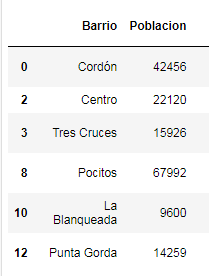



In [121]:
montevideo_pocitos = df_montevideo_sport_foods_sitios[df_montevideo_sport_foods_sitios['Barrio'] == 'Pocitos']
montevideo_pocitos

,Barrio,Barrio Latitud,Barrio Longitud,Local,Local Latitud,Local Longitud,Local Dirección(esquina),Local Categoria
480,Pocitos,-34.911123,-56.150593,Motociclo Sports,-34.909032,-56.146623,Miguel Barreiro 3243 (Berro),Sporting Goods Shop
461,Pocitos,-34.911123,-56.150593,Club Trouville,-34.912473,-56.149755,Chucarro 1031,Basketball Stadium
433,Pocitos,-34.911123,-56.150593,Playa de los Pocitos,-34.912655,-56.145973,Rambla República del Perú (Avenida de Brasil),Beach
448,Pocitos,-34.911123,-56.150593,Rambla y Avenida Brasil,-34.914673,-56.148711,Montevideo Montevideo,Beach
425,Pocitos,-34.911123,-56.150593,Miyagi Shushi,-34.908886,-56.148351,Gabriel Pereira 3138 (26 de marzo),Japanese Restaurant
426,Pocitos,-34.911123,-56.150593,Fellini Ristobaretto,-34.913196,-56.148436,José Martí 3408 (Benito Blanco),Italian Restaurant
428,Pocitos,-34.911123,-56.150593,Gago,-34.912575,-56.148849,Jose Marti 3383 (Juan Benito Blanco),Falafel Restaurant
430,Pocitos,-34.911123,-56.150593,Tandory,-34.907692,-56.152395,Ramon Masini 1130 (Libertad),Restaurant
436,Pocitos,-34.911123,-56.150593,La Cavia,-34.912359,-56.152623,26 de Marzo (Cavia),Latin American Restaurant
445,Pocitos,-34.911123,-56.150593,Milajó,-34.907083,-56.151044,Libertad (Gabriel Pereira),Italian Restaurant


In [149]:
#Definimos las coordenadas de Montevideo
latitude3 =montevideo_pocitos.iloc[[0],[1]].astype(float)
longitude3 = montevideo_pocitos.iloc[[0],[2]].astype(float)
print('Latitud Pocitos-Montevideo:',latitude3)
print('Longitud Pocitos-Montevideo:',longitude3)

Latitud Pocitos-Montevideo:      Barrio Latitud
480      -34.911123
Longitud Pocitos-Montevideo:      Barrio Longitud
480       -56.150593


In [153]:
montevideo_pocitos_map = folium.Map(location=[-34.911123, -56.150593], zoom_start=16, tiles = 'Stamen Toner')
# establecer el esquema de color para las agrupaciones

# añadir marcadores al mapa
for lat, lon, loc, cat, addr in zip(montevideo_pocitos['Local Latitud'], montevideo_pocitos['Local Longitud'],
                                  montevideo_pocitos['Local'], montevideo_pocitos['Local Categoria'],
                             montevideo_pocitos['Local Dirección(esquina)']):
    label = folium.Popup(str(addr) + ' - ' + str(cat), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.9).add_to(montevideo_pocitos_map)
    folium.map.Marker(
        [lat,lon],
        icon=DivIcon(
        icon_size=(20,20),
        icon_anchor=(0,0),
        html='<div style="font-size: 5; color: blue;"><b>%s</b></div>' % '{}'.format(loc))).add_to(montevideo_pocitos_map)
       
montevideo_pocitos_map

In [158]:
import datetime
print('Terminado:', datetime.date.today().strftime('%d/%m/%Y'))

Terminado: 26/11/2021
